# 2D Probability Distribution

## Dirichlet distribution

In [5]:
import scipy.stats as stats
import numpy as np
from my_stats.probability_distribution.two_dim_prob_dist import (
    create_dirichlet_input,
    TwoDimensionalDistributionData,
    render_plot_2d,
)


def prepare_dirichlet_data(alpha: np.ndarray) -> TwoDimensionalDistributionData:
    # 1. データ取得 (X, Y も受け取る)
    points, mask, X_grid, Y_grid = create_dirichlet_input()
    print(points[0])

    # 2. PDF計算 (有効な点だけ計算されるので高速)
    # points は (3, N) なのでそのまま渡せばOK
    pdf_values = stats.dirichlet.pdf(points, alpha)

    # 3. 2次元グリッドへの復元 (ここが重要！)
    # 元の形状 (100, 100) のゼロ配列を作る
    Z_grid = np.zeros(mask.shape)

    # マスクの位置に計算結果を代入する
    # これで、定義域外は 0、定義域内は計算値が入った (100, 100) の配列になる
    Z_grid[mask] = pdf_values

    # 4. データクラスへの格納
    # X, Y, Z すべて (100, 100) の2次元配列として渡す
    return TwoDimensionalDistributionData(
        X=X_grid,  # points[0,:] ではなくグリッドを渡す
        Y=Y_grid,  # points[1,:] ではなくグリッドを渡す
        Z=Z_grid,  # 復元したZを渡す
    )

[0.         0.01010101 0.02020202 ... 0.         0.01010101 0.        ]


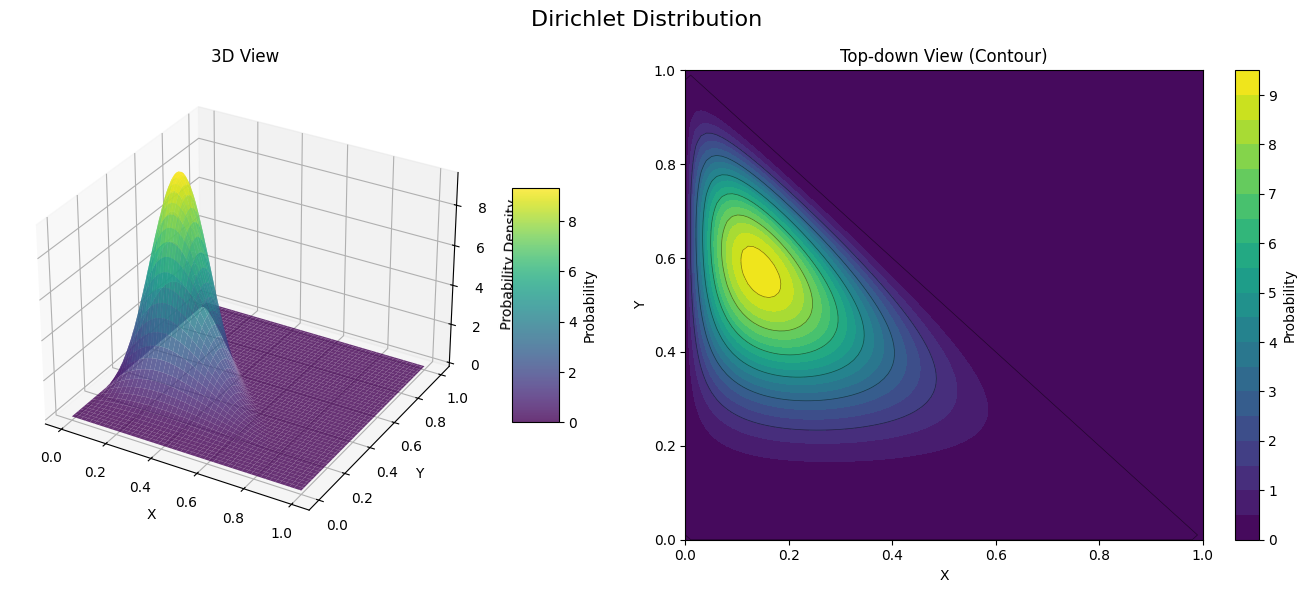

In [6]:
data = prepare_dirichlet_data(alpha=np.array([2.0, 5.0, 3.0]))
render_plot_2d(data, title="Dirichlet Distribution")

[0.         0.01010101 0.02020202 ... 0.         0.01010101 0.        ]


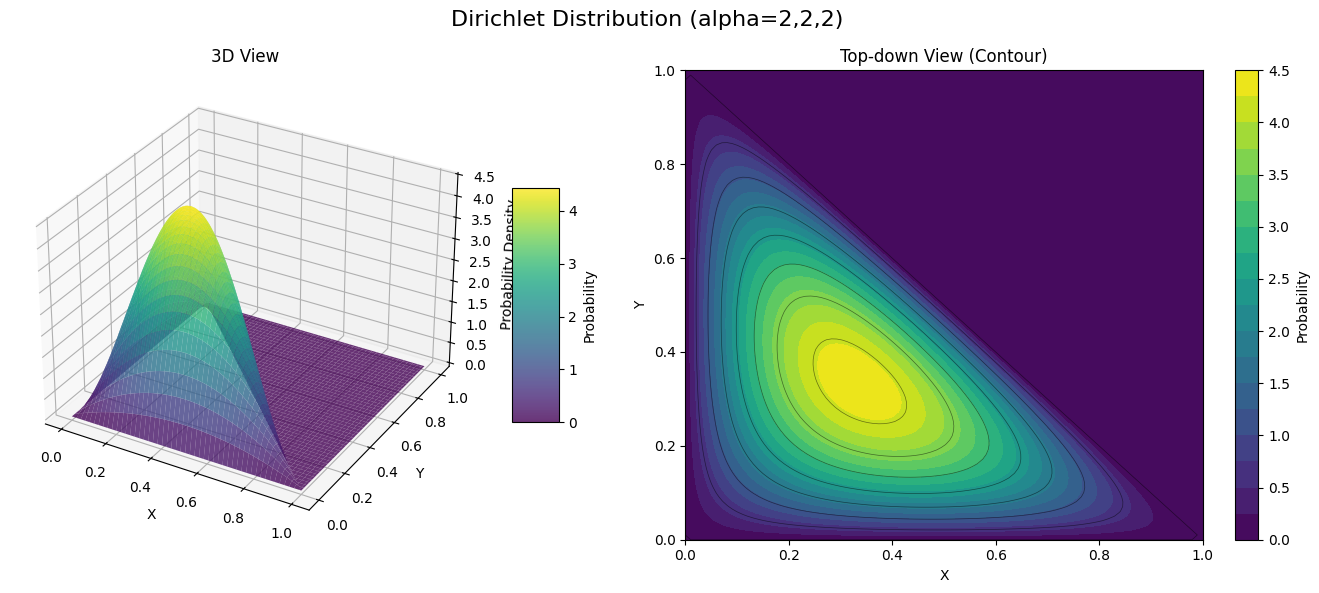

In [7]:
data = prepare_dirichlet_data(alpha=np.array([2.0, 2.0, 2.0]))
render_plot_2d(data, title="Dirichlet Distribution (alpha=2,2,2)")